In [ ]:
#Importing library
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import gc
from google.colab import output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import tensorflow as tf
np.random.seed(1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
DATADIR= '/content/'
CATEGORIES= ['new_with_mask','new_without_mask']
IMG_SIZE = 150

In [ ]:
!rm -rf /content/data
!kaggle datasets download -d niharika41298/withwithout-mask
!mkdir data
!unzip /content/withwithout-mask.zip -d /content/data
output.clear()

In [ ]:
train_dir ="/content/data/maskdata/maskdata/train"
test_dir="/content/data/maskdata/maskdata/test"

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)


Found 493 images belonging to 2 classes.
Found 123 images belonging to 2 classes.


In [ ]:
def model_define():
  #Create a sequential model
  model = Sequential()

  # 1st Convolutional Layer
  model.add(Conv2D(filters=48, input_shape=(IMG_SIZE,IMG_SIZE,3), kernel_size=(11,11),strides=(4,4), padding='valid',))
  model.add(Activation('relu'))

  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation before passing it to the next layer
  model.add(BatchNormalization())

  # 2nd Convolutional Layer
  model.add(Conv2D(filters=128, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 3rd Convolutional Layer
  model.add(Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 4th Convolutional Layer
  model.add(Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 5th Convolutional Layer
  model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
  model.add(Activation('relu'))
  # Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  # Batch Normalisation
  model.add(BatchNormalization())

  # Passing it to a dense layer
  model.add(Flatten())
  # 1st Dense Layer
  model.add(Dense(4096, input_shape=(IMG_SIZE*IMG_SIZE*3,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 2nd Dense Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # 3rd Dense Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  # Batch Normalisation
  model.add(BatchNormalization())

  # Output Layer
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  return model

In [ ]:
def compile(model,lr,epoch_number,optimizer):
  model.compile(
      optimizer=optimizer(learning_rate=lr),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  history = model.fit(
      train_images,
      validation_data=val_images,
      epochs=epoch_number,
      # callbacks=[
      #     tf.keras.callbacks.EarlyStopping(
      #         min_delta = 0.01,
      #         monitor='val_accuracy',
      #         patience=5,
      #         restore_best_weights=True
      #     )
      # ]
  )
  return history

In [ ]:
model = model_define()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 35, 35, 48)        17472     
_________________________________________________________________
activation (Activation)      (None, 35, 35, 48)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 48)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 17, 17, 48)        192       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         743552    
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 128)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0

In [ ]:
model  =  model_define()
history = compile(model,0.01,100,tf.keras.optimizers.Adagrad)

Epoch 1/100
16/16 [==============================] - 34s 189ms/step - loss: 0.5756 - accuracy: 0.6910 - val_loss: 1.0051 - val_accuracy: 0.5528
Epoch 2/100
16/16 [==============================] - 2s 128ms/step - loss: 0.1501 - accuracy: 0.9395 - val_loss: 0.7862 - val_accuracy: 0.5528
Epoch 3/100
16/16 [==============================] - 2s 133ms/step - loss: 0.0962 - accuracy: 0.9623 - val_loss: 0.7294 - val_accuracy: 0.5610
Epoch 4/100
16/16 [==============================] - 2s 130ms/step - loss: 0.0935 - accuracy: 0.9729 - val_loss: 0.7894 - val_accuracy: 0.5854
Epoch 5/100
16/16 [==============================] - 2s 131ms/step - loss: 0.1311 - accuracy: 0.9465 - val_loss: 0.4875 - val_accuracy: 0.6748
Epoch 6/100
16/16 [==============================] - 2s 131ms/step - loss: 0.0585 - accuracy: 0.9766 - val_loss: 0.2620 - val_accuracy: 0.9431
Epoch 7/100
16/16 [==============================] - 2s 135ms/step - loss: 0.0895 - accuracy: 0.9561 - val_loss: 0.2411 - val_accuracy: 0.918

In [ ]:
learning_rates = [0.00001,0.0001,0.001,0.01,0.1]
accuracy = []
for lr in learning_rates:
  model = model_define()
  history = compile(model,lr,100)
  acc = history.history['val_accuracy']
  epochs=range(len(acc))
  plt.plot(epochs, acc)
  output.clear
print(accuracy)
plt.legend(['1e-5','1e-4','1e-3','1e-2','0.1',],loc='upper right')
plt.figure()

In [ ]:
optimizers = [tf.keras.optimizers.SGD,tf.keras.optimizers.Adam,tf.keras.optimizers.RMSprop,tf.keras.optimizers.Adagrad]
for opt in optimizers:
  model = model_define()
  history = compile(model,lr,50)
  acc = history.history['val_accuracy']
  epochs=range(len(acc))
  plt.plot(epochs, acc)
  output.clear
print(accuracy)
plt.legend(['1e-5','1e-4','1e-3','1e-2','0.1',],loc='upper right')
plt.figure()

<Figure size 432x288 with 0 Axes>

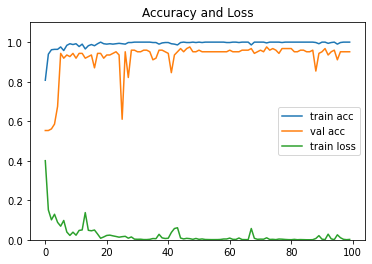

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline


import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.plot(epochs, loss)


plt.ylim([0,1.1])

plt.legend(['train acc','val acc','train loss','val loss'])
plt.title('Accuracy and Loss')

plt.figure()


In [ ]:
test_images = test_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)
results = model.evaluate(test_images, verbose=0)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))

Found 198 images belonging to 2 classes.
    Loss: 0.05017
Accuracy: 98.485%


In [ ]:
sample_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

sample_images = sample_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42
)
results = model.evaluate(sample_images, verbose=0)
print("    Loss: {:.5f}".format(results[0]))
print("Accuracy: {:.3f}%".format(results[1] * 100))

Found 198 images belonging to 2 classes.
    Loss: 0.05017
Accuracy: 98.485%


In [ ]:
print(sample_images)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.99      0.98      0.99       132

    accuracy                           0.98       198
   macro avg       0.98      0.98      0.98       198
weighted avg       0.98      0.98      0.98       198



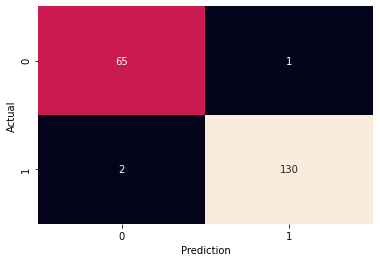

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

prediction = model.predict(sample_images).flatten()
prediction = np.round(prediction)
y_test = sample_images.classes
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')
print(classification_report(y_test,prediction))

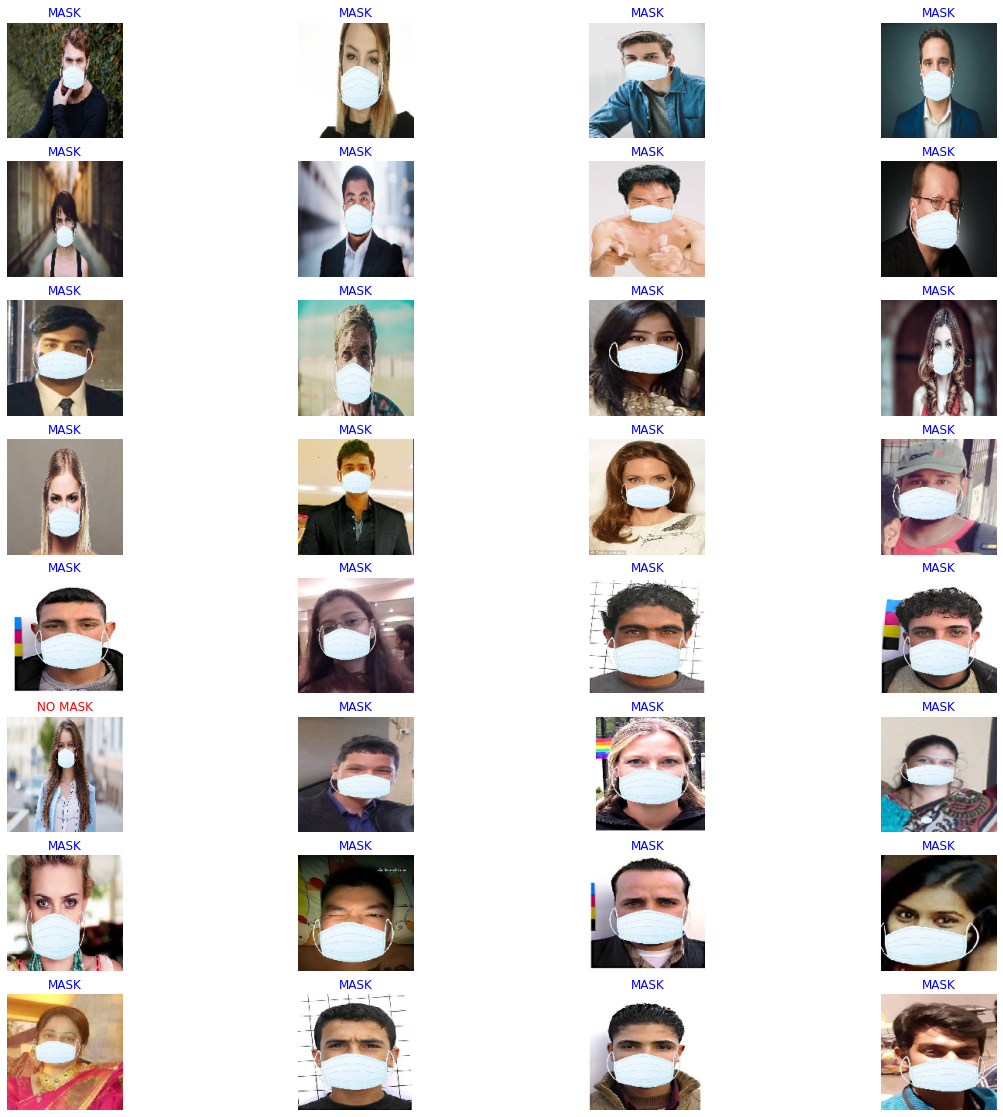

In [ ]:
samples = sample_images.next()

predictions = np.squeeze(model.predict(samples[0]) >= 0.5).astype(np.int)
labels = samples[1].astype(np.int)

plt.figure(figsize=(20, 20))

for i in range(32):
    plt.subplot(8, 4, i + 1)
    plt.imshow(samples[0][i])
    plt.axis('off')
    plt.title(("NO MASK" if predictions[i] == 1 else "MASK"), color=('blue' if labels[i] == predictions[i] else 'red'))

plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

prediction = np.round(model.predict(samples[0]))
y_test = samples[1]
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [ ]:
# prediction = np.round(model.predict(test_images))
# y_test = test_images.classes
# sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cbar=False, fmt='d')
# plt.xlabel('Prediction')
# plt.ylabel('Actual')